**Klasifikasi Diagnosis Tumor Ganas dan Tumor Jinak (Kanker Payudara)**

**Anggota Kelompok :**

**- Azka Fauzi Al Parisi (197006057)**

**- Defri Crisna Pramudi (197006065)**

# Business Understanding


Dataset ini telah di download dan berasal dari url berikut = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'

atau data asli dapat diakses di kaggle, link berikut :

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Dataset ini merupakan kumpulan data cancer/ kanker payudara di Winconsin, yaitu sebuah negara bagian di Amerika Serikat. Kumpulan data ini berisi diagnosis kanker dengan membagi menjadi tumor jinak (Benign) dan tumor ganas (Malignant) berdasarkan nilai-nilai medis yang diteliti.  Benign tumor/ Tumor jinak disebut juga tumor non-kanker yang biasanya tidak mengancam jiwa.Sementara (malignant tumor) adalah tumor yang terbentuk dari sel kanker.

Jika sebelumnya data ini pernah dilakukan percobaaan dengan menggunakan algoritma KNN (K-Nearest-Neighbors) maka pada studi kasus ini kami menggunakan algoritma Support Vector Machine/Support Vector Classification untuk mengkalisifikasikannya dengan mencari tumor yang terdeteksi/terdiagnosis?

Dengan menerapakan train dan test data, berapakah nilai accuracy/ketepatan algoritma SVM ini untuk mengklasifikasi kelas berdasarkan diagnosis tumor yang terdeteksi/terdiagnosis?


# Data Understanding

Terdapat 569 baris dan 33 kolom data. Beberapa kolom/atribut data terdiri dari :

id: Id sebuah data

diagnosis: hasil diagnosis dengan inisial M untuk Mallignant (Ganas) dan B untuk Benign (Jinak)

Kemudian ada kolom berisi nilai-nilai yang merupkan catatan medis atau yang sudah diteliti dengan pendekatan medis, seperti :

radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se. symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst fractal_dimension_worst

Kemudian kolom Unnamed:32 yang tidak berisi nilai dan akan dihapus

# Import dan Mengumpulkan Data

In [ ]:
#Memanggil library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Mengimport data csv
df = pd.read_csv("data_breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Menelaah Data

In [ ]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Data Preparation

In [ ]:
# Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Nilai label - 1 untuk Malignant, 2 untuk Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Menyalin nilai yang ada di colom diagnosis ke label/colom baru yaitu Class
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Drop kolom yang tidak perlu
df.head()  #Menampilkan 5 dataset pertama

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
target_names = ['', 'M', 'B']
df['attack_type'] = df.Class.apply(lambda x: target_names[x])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,M


# Data Visualisasi

In [ ]:
df1 = df[df.Class == 1]
df2 = df[df.Class == 2]

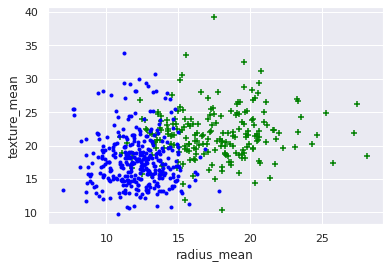

In [ ]:
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='green', marker='+')
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='blue', marker='.')

# Pemodelan data menggunakan algoritma SVM

Membuat variabel baru (X) untuk menghilangkan label Class dan attack_type dan variabel (y) yang hanya menampilkan Class

In [ ]:
X = df.drop(['Class', 'attack_type'], axis='columns')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df.Class

Menggunakan fungsi train_test_split untuk membagi data training dan data testing, pada kasus ini proporsinya adalah 70% data training dan 30% data testing. Proses split tersebut menghasilkan 4 kumpulan data yang ditampung dalam 4 variabel berbeda

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(len(X_train))
print(len(X_test))

398
171


Perintah untuk melihat proposrsi secara pasti data yang di train dan di test. Setelah itu di buat sebuah model SVC kernel 'linear'

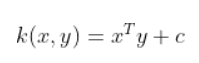

Kernel Linear adalah fungsi kernel yang paling sederhana. Ini diberikan oleh produk dalam (x,y) ditambah konstanta opsional c

In [ ]:
model = SVC(kernel='linear')

# Testing Model

model. fit() : fit training data. Untuk pembelajaran supervised , this dengan mengisi dua argument contoh (X, y)

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

function model-predict digunakan untuk memprediksi label nilai data berdasarkan model yang dilatih. Fungsi predict() hanya menerima satu argumen yang biasanya merupakan data yang akan diuji. Kasus ini kami menggunakan X_test untuk diuji

In [ ]:
pre = model.predict(X_test)
print(pre)

[2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 2 2 2 2 2 2 2 2 1 2 2 1 1 2 1 1 1 2 2 1 1
 1 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 1 1 2 2 2
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1
 2 1 2 1 2 1 2 2 1 1 2 2 2 2 1 2 2 2 1 1 1 1 1 2 2 1 1 1 2 2 2 1 2 1 2 1 2
 1 2 1 1 1 2 2 1 2 1 2 1 2 2 1 1 2 2 2 1 1 2 2]


In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, pre)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[68  3]
 [ 3 97]]
Test Set: 171
Accuracy = 96.49122807017544 %


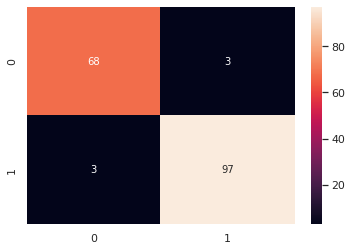

In [ ]:
sns.heatmap(confusion_matrix(y_test, pre), annot = True)

Berdasarkan hasil confusion Matrix 165 diprediksi dengan benar (68+97). Sedngkan 6 data di prediksi dengan salah (3+3)

![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg")


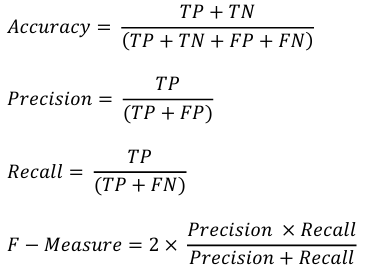

Metrics for the evaluation of a classification model


**Akurasi** mengembalikan proporsi prediksi yang benar.

**Presisi** mengembalikan proporsi positif sejati di antara semua nilai yang diprediksi sebagai positif.

**Recall** mengembalikan proporsi nilai positif yang diprediksi dengan

**F1-score** adalah rata-rata  presisi dan recall. Ini sering digunakan untuk membandingkan pengklasifikasi.

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy Classification")
print(classification_report(y_test,pre))

Accuracy Classification
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        71
           2       0.97      0.97      0.97       100

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Kesimpulan

Berdasarkan hasil klasifikasi data breast cancer menggunakan SVM, nilai accuracy yang didapatkan sebesar 96%